In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [500]:
#1. Load and display the first 5 rows of the dataset. What kind of information does the
#dataset contain?


ddf=pd.read_csv(r"C:\Users\vasud\Downloads\housing_data.csv")
ddf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [501]:
#2. Check for missing values. Are there any? How would you handle them?

ddf.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [502]:
#3. Describe the statistical summary (mean, median, min, max) of the dataset. What
#insights can you draw?
ddf.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [503]:
Q1= ddf['sqft_living'].quantile(0.25)
Q1

np.float64(1460.0)

In [504]:
Q1= ddf['price'].quantile(0.25)
Q3=ddf['price'].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(332087.5)

In [505]:
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

In [506]:
ddf.drop(ddf[ddf["price"]>upper].index ,inplace=True)
ddf.drop(ddf[ddf["price"]<lower].index, inplace=True)

In [507]:
ddf

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [508]:
ddf['price'].unique()

array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
       203400.      , 220600.      ], shape=(1569,))

In [509]:
ddf.select_dtypes(include=['object']).columns

Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')

In [510]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
col=['date','street','city','statezip','country']
for i in ddf[col]:
    ddf[i]=lab_enc.fit_transform(ddf[i])
    

In [511]:
print(ddf)

      date          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0        0  313000.000000       3.0       1.50         1340      7912     1.5   
2        0  342000.000000       3.0       2.00         1930     11947     1.0   
3        0  420000.000000       3.0       2.25         2000      8030     1.0   
4        0  550000.000000       4.0       2.50         1940     10500     1.0   
5        0  490000.000000       2.0       1.00          880      6380     1.0   
...    ...            ...       ...        ...          ...       ...     ...   
4595    68  308166.666667       3.0       1.75         1510      6360     1.0   
4596    68  534333.333333       3.0       2.50         1460      7573     2.0   
4597    68  416904.166667       3.0       2.50         3010      7014     2.0   
4598    69  203400.000000       4.0       2.00         2090      6630     1.0   
4599    69  220600.000000       3.0       2.50         1490      8102     2.0   

      waterfront  view  con

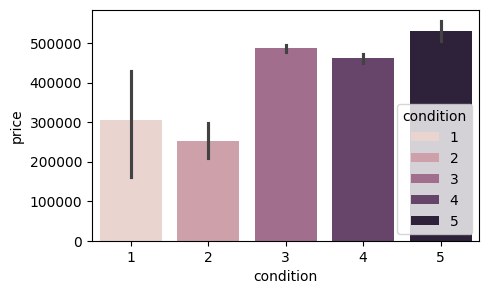

In [512]:
plt.figure(figsize=(5,3))
sns.barplot(x=ddf['condition'],
            y=ddf['price'],
            hue=ddf["condition"])
plt.show()

<Axes: xlabel='sqft_living', ylabel='price'>

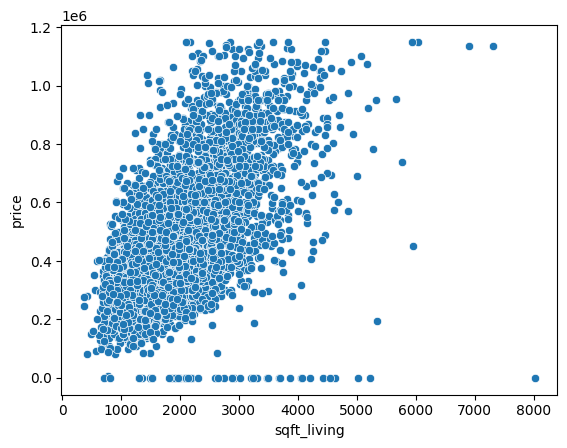

In [513]:
sns.scatterplot(x=ddf['sqft_living'], y=ddf['price'])

<Axes: xlabel='bedrooms', ylabel='price'>

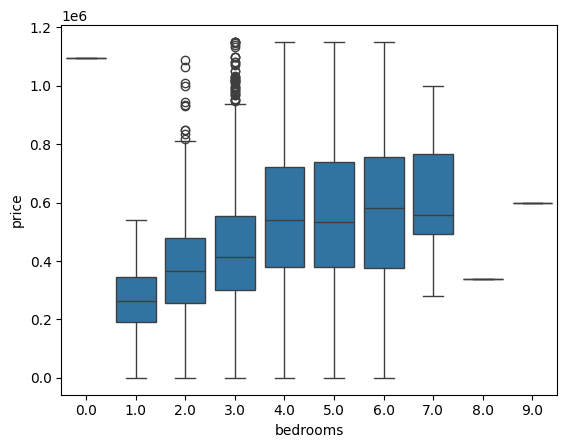

In [514]:
sns.boxplot(x='bedrooms',y='price',data=ddf,)

<Axes: xlabel='bathrooms', ylabel='price'>

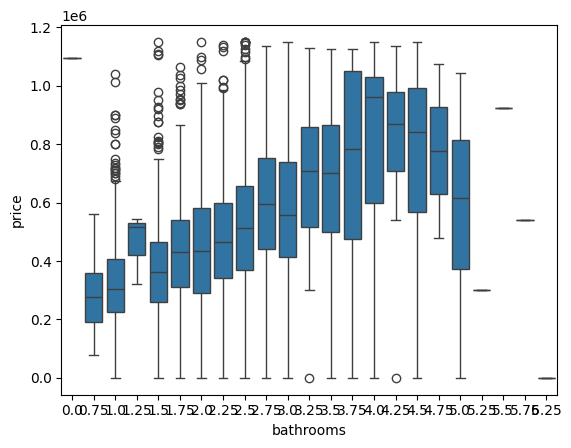

In [515]:
sns.boxplot(x='bathrooms',y='price',data=ddf,)

<Axes: xlabel='waterfront', ylabel='price'>

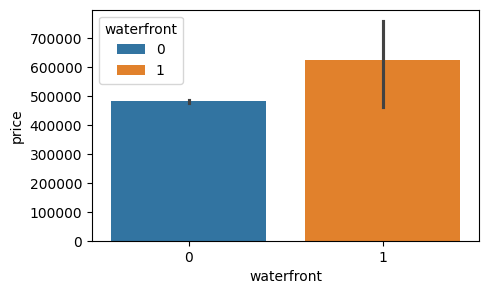

In [516]:
#7. Is there a price difference between houses on the main road vs those not? Use a
#bar chart or violin plot.

plt.figure(figsize=(5,3))
sns.barplot(x=ddf['waterfront'],
            y=ddf['price'],
            hue=ddf["waterfront"])

In [517]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4360 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4360 non-null   int64  
 1   price          4360 non-null   float64
 2   bedrooms       4360 non-null   float64
 3   bathrooms      4360 non-null   float64
 4   sqft_living    4360 non-null   int64  
 5   sqft_lot       4360 non-null   int64  
 6   floors         4360 non-null   float64
 7   waterfront     4360 non-null   int64  
 8   view           4360 non-null   int64  
 9   condition      4360 non-null   int64  
 10  sqft_above     4360 non-null   int64  
 11  sqft_basement  4360 non-null   int64  
 12  yr_built       4360 non-null   int64  
 13  yr_renovated   4360 non-null   int64  
 14  street         4360 non-null   int64  
 15  city           4360 non-null   int64  
 16  statezip       4360 non-null   int64  
 17  country        4360 non-null   int64  
dtypes: float64(4)

In [518]:
col=[]

In [519]:
x=ddf.drop('price',axis=1)
y=ddf['price']

In [520]:
x.drop('statezip',axis=1,inplace=True)
x.drop('date',axis=1,inplace=True)
x.drop('country',axis=1,inplace=True)


In [521]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.3))

In [522]:
from sklearn.linear_model import LinearRegression
len_rig=LinearRegression()
len_rig.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [523]:
y_pred=len_rig.predict(x_test)
y_pred[:10]

array([250137.44967528, 586567.80399448, 344793.45158352, 876764.57372846,
       490750.97014899, 434217.45623231, 450112.49354916, 539966.39933038,
       729046.13868409, 341469.17056831])

In [524]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

41.23227604560991

In [525]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

166200.77241055804